In [ ]:
import tensorflow as tf

# Loading the dataset
mnist = tf.keras.datasets.mnist

# Divide into training and test dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train.shape
# (60000, 28, 28)

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

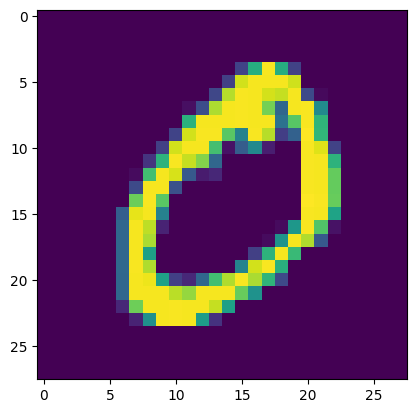

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

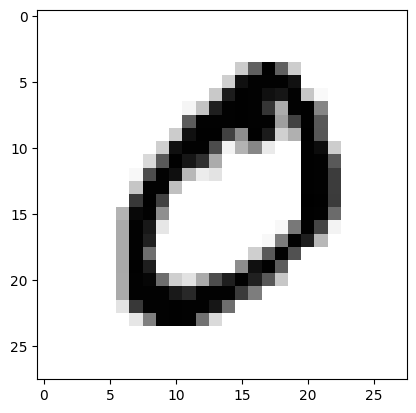

In [ ]:
plt.imshow(x_train[1], cmap = plt.cm.binary)

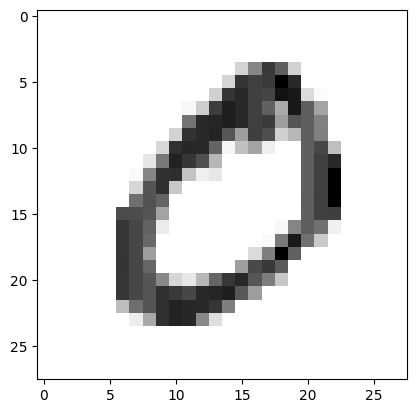

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[1], cmap = plt.cm.binary)

In [ ]:
print(y_train[1])

0


In [ ]:
#input data has a shape of (batch_size, height, width, depth)
import numpy as np
IMG_SIZE=28
# -1 is a shorthand, which returns the length of the dataset i.e 60000
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Creating the network
model = Sequential()

### First Convolution Layer
# 64 -> number of filters, (3,3) -> size of each kernal,
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
# For first layer we have to mention the size of input
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Second Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Third Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

### Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

### Fully connected layer 3, output layer must be equal to number of classes
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
#training the model
model.fit(x_trainr, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 39s 29ms/step - loss: 0.3393 - accuracy: 0.8935 - val_loss: 0.1551 - val_accuracy: 0.9514
Epoch 2/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.1068 - accuracy: 0.9675 - val_loss: 0.0926 - val_accuracy: 0.9718
Epoch 3/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0749 - accuracy: 0.9771 - val_loss: 0.0688 - val_accuracy: 0.9783
Epoch 4/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0699 - val_accuracy: 0.9788
Epoch 5/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0613 - val_accuracy: 0.9814


In [ ]:
# Evaluating the accuracy on the test data
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Test Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0574 - accuracy: 0.9828
Test Loss on 10,000 test samples 0.057441968470811844
Test Accuracy on 10,000 test samples 0.9828000068664551


313/313 [==============================] - 2s 8ms/step
[[1.7017568e-07 1.4320340e-05 7.4751333e-06 ... 9.9996167e-01
  1.0056959e-06 7.9829606e-06]
 [6.3707179e-04 1.2427664e-06 9.9935889e-01 ... 8.3779881e-08
  1.8894486e-08 1.0257370e-07]
 [9.7043099e-08 9.9999124e-01 9.4396185e-08 ... 1.6643502e-07
  2.8595494e-07 3.2290451e-08]
 ...
 [5.4643422e-08 1.1236687e-06 2.2073402e-07 ... 1.5309513e-07
  1.8458336e-06 1.5584876e-06]
 [2.0760101e-05 8.2094003e-09 1.8191477e-08 ... 5.6422511e-10
  4.1773837e-06 1.4146874e-05]
 [6.5578031e-05 2.1907453e-11 9.6506465e-06 ... 1.8141941e-11
  1.8646723e-07 5.8676397e-07]]
0


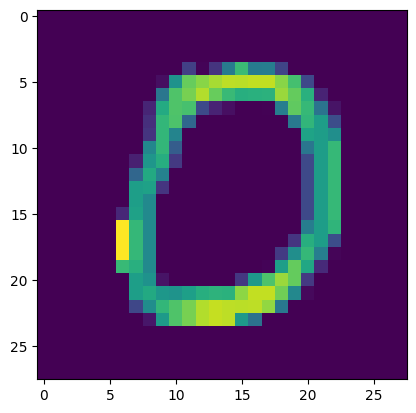

In [ ]:
predictions = model.predict([x_testr])
print(predictions)

plt.imshow(x_test[10])
print(np.argmax(predictions[10]))

1/1 [==============================] - 0s 15ms/step
4


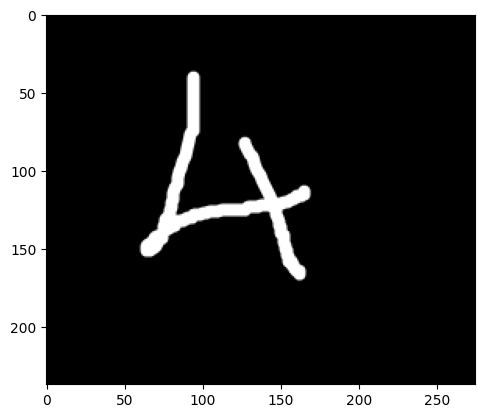

In [ ]:
import cv2
img = cv2.imread('four.png')
plt.imshow(img)
img.shape
# (28, 28, 3)

# Converting to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape
# (28, 28)

# Resizing to a 28x28 image
# Please note my image was already in correct dimension
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
resized.shape
# (28, 28)

# 0-1 scaling
newimg = tf.keras.utils.normalize(resized, axis = 1)

# For kernal operations
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

newimg.shape
# (1, 28, 28, 1)

predictions = model.predict(newimg)
print(np.argmax(predictions[0]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Saving a Keras model:
model.save('path/to/location')

In [ ]:
#from tensorflow import keras
#model = keras.models.load_model('path/to/location')